Project Task 1 - Basic Classifiers and Evaluation

1) Prepare the dataset in order to build several basic classifiers able to predict room occupancy from the available variables. You are welcome in creating new variables.

2) Solve the classification task with k-NN (testing values of k), Naive Bayes, Logistic Regression, Decision Tree using cross-validation and/or random/grid search for parameter estimation.

3) Evaluate each classifier using Accuracy, Precision, Recall, F1, ROC, AUC and Lift Chart.

4) Try to reduce the dimensionality of the dataset using the methods studied (or new ones). Test PCA and try to solve the classification task in two dimensions. Plot the dataset in the two new dimensions and observe the decision boundary and the one of the trained algorithms.

5) Analyze the value distribution of the class to predict and turn the dataset into an imbalanced version reaching a strong majority-minority distribution (e.g. 96%-4%). Then solve again the classification task adopting the various techniques studied (or new ones).

6) Select two continuous attributes, define a regression problem and try to solve it using different techniques reporting various evaluation measures. Plot the two-dimensional dataset. Then generalize to multiple linear regression and observe how the performance varies.

7) Draw your conclusions about the basic classifiers and techniques adopted in this analysis.


In [1044]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

import datetime
from sklearn import preprocessing


In [1045]:
df = pd.read_csv("AirQualityUCI_new.csv")

In [1046]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


### Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded. 

### Attribute Information:

Date - Date (DD/MM/YYYY)

Time - Time (HH.MM.SS)

CO(GT) - True hourly averaged concentration CO in mg/m^3 (reference analyzer)

PT08.S1(CO) - PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

NMHC(GT) - True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

C6H6(GT) - True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

PT08.S2(NMHC) - PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

NOx(GT) - True hourly averaged NOx concentration in ppb (reference analyzer)

PT08.S3(NOx) - PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

NO2(GT) - True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

PT08.S4(NO2) - PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

PT08.S5(O3) - PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

T - Temperature in Â°C

RH - Relative Humidity (%)

AH - Absolute Humidity 

In [1047]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [1048]:
df.shape

(9471, 17)

# Data Preparation

In [1049]:
df.drop(['Unnamed: 15','Unnamed: 16'],axis= 1, inplace = True)

In [1050]:
df.sort_values('Date',ascending = False, inplace=True)

In [1051]:
df.Date.replace(to_replace = 'NaN',value = 0,inplace = True)

In [1052]:
df.dropna(how = 'all',inplace=True)

In [1053]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [1054]:
print(max(df.Date),"\n",min(df.Date))

9/9/2004 
 1/1/2005


In [1055]:
b = pd.DataFrame(df.Date)
b['Date'] = pd.to_datetime(b['Date'])

b['day_of_week'] = b['Date'].dt.day_name()

In [1056]:
df['weekday'] = b['day_of_week']

In [1057]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,weekday
4396,9/9/2004,22:00:00,1.5,1088.0,-200.0,11.3,1024.0,180.0,831.0,111.0,1452.0,1182.0,27.4,31.5,1.1330,Thursday
4387,9/9/2004,13:00:00,2.0,1096.0,-200.0,13.0,1083.0,310.0,971.0,129.0,1430.0,986.0,35.0,17.3,0.9542,Thursday
4374,9/9/2004,0:00:00,1.4,999.0,-200.0,7.5,879.0,180.0,1114.0,119.0,1260.0,960.0,24.9,28.3,0.8775,Thursday
4375,9/9/2004,1:00:00,1.2,980.0,-200.0,7.4,873.0,141.0,1088.0,98.0,1258.0,949.0,23.2,30.5,0.8558,Thursday
4376,9/9/2004,2:00:00,0.6,859.0,-200.0,3.8,698.0,105.0,1254.0,89.0,1157.0,819.0,22.3,33.6,0.8959,Thursday


In [1058]:
b

,Date,day_of_week
4396,2004-09-09,Thursday
4387,2004-09-09,Thursday
4374,2004-09-09,Thursday
4375,2004-09-09,Thursday
4376,2004-09-09,Thursday
...,...,...
7130,2005-01-01,Saturday
7131,2005-01-01,Saturday
7132,2005-01-01,Saturday
7133,2005-01-01,Saturday


In [1059]:
tf = []
for i in df.weekday:
    if i == 'Sunday' or i == 'Saturday':
        tf.append(1)
    else:
        tf.append(0)

In [1060]:
df['weekend'] = tf

In [1061]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,weekday,weekend
4396,9/9/2004,22:00:00,1.5,1088.0,-200.0,11.3,1024.0,180.0,831.0,111.0,1452.0,1182.0,27.4,31.5,1.1330,Thursday,0
4387,9/9/2004,13:00:00,2.0,1096.0,-200.0,13.0,1083.0,310.0,971.0,129.0,1430.0,986.0,35.0,17.3,0.9542,Thursday,0
4374,9/9/2004,0:00:00,1.4,999.0,-200.0,7.5,879.0,180.0,1114.0,119.0,1260.0,960.0,24.9,28.3,0.8775,Thursday,0
4375,9/9/2004,1:00:00,1.2,980.0,-200.0,7.4,873.0,141.0,1088.0,98.0,1258.0,949.0,23.2,30.5,0.8558,Thursday,0
4376,9/9/2004,2:00:00,0.6,859.0,-200.0,3.8,698.0,105.0,1254.0,89.0,1157.0,819.0,22.3,33.6,0.8959,Thursday,0


In [1062]:
df.reset_index(inplace=True)

In [1063]:
df.drop(columns=['index','weekday','Date','Time','AH'],axis = 1,inplace=True)

In [1064]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,weekend
0,1.5,1088.0,-200.0,11.3,1024.0,180.0,831.0,111.0,1452.0,1182.0,27.4,31.5,0
1,2.0,1096.0,-200.0,13.0,1083.0,310.0,971.0,129.0,1430.0,986.0,35.0,17.3,0
2,1.4,999.0,-200.0,7.5,879.0,180.0,1114.0,119.0,1260.0,960.0,24.9,28.3,0
3,1.2,980.0,-200.0,7.4,873.0,141.0,1088.0,98.0,1258.0,949.0,23.2,30.5,0
4,0.6,859.0,-200.0,3.8,698.0,105.0,1254.0,89.0,1157.0,819.0,22.3,33.6,0


# Data distribution

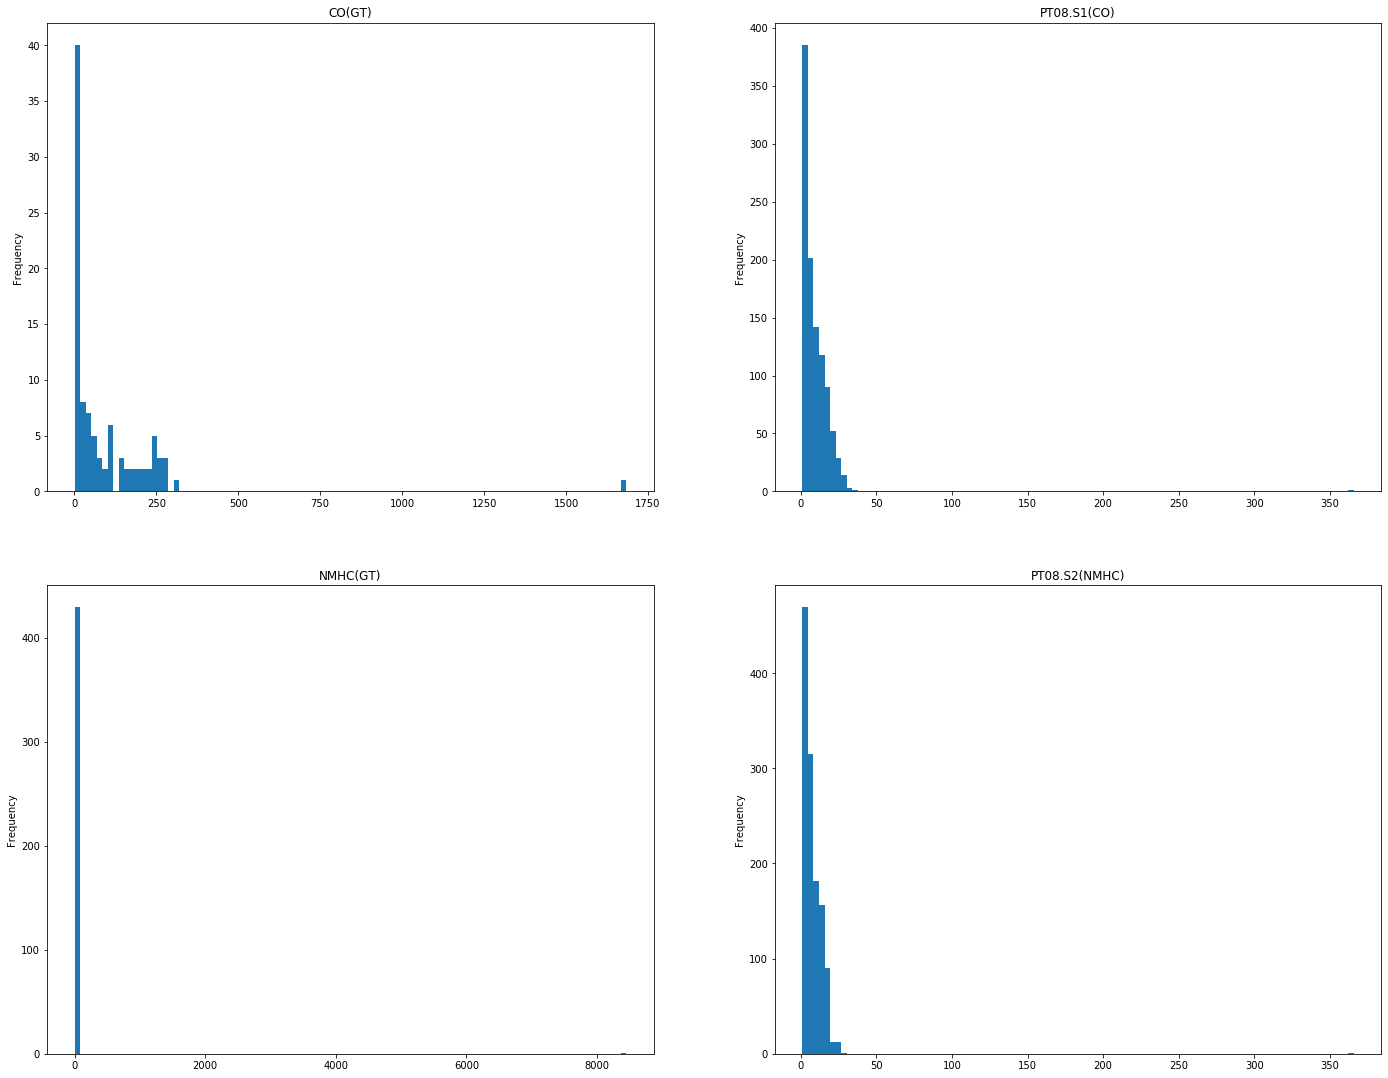

In [1065]:
# Set up a grid of plots
fig = plt.figure(figsize=(50, 50)) 
fig_dims = (5, 4)

# Plot Type of transmission
plt.subplot2grid(fig_dims, (0, 0))
df['CO(GT)'].value_counts().plot(kind='hist', 
                                   title='CO(GT)',bins=100)


plt.subplot2grid(fig_dims, (0, 1))
df['PT08.S1(CO)'].value_counts().plot(kind='hist', title='PT08.S1(CO)',bins=100)


plt.subplot2grid(fig_dims, (1, 0))
df['NMHC(GT)'].value_counts().plot(kind='hist', title='NMHC(GT)',bins=100)
plt.xticks(rotation=0)


plt.subplot2grid(fig_dims, (1, 1))
df['PT08.S2(NMHC)'].value_counts().plot(kind='hist', title='PT08.S2(NMHC)',bins=100)

plt.show()

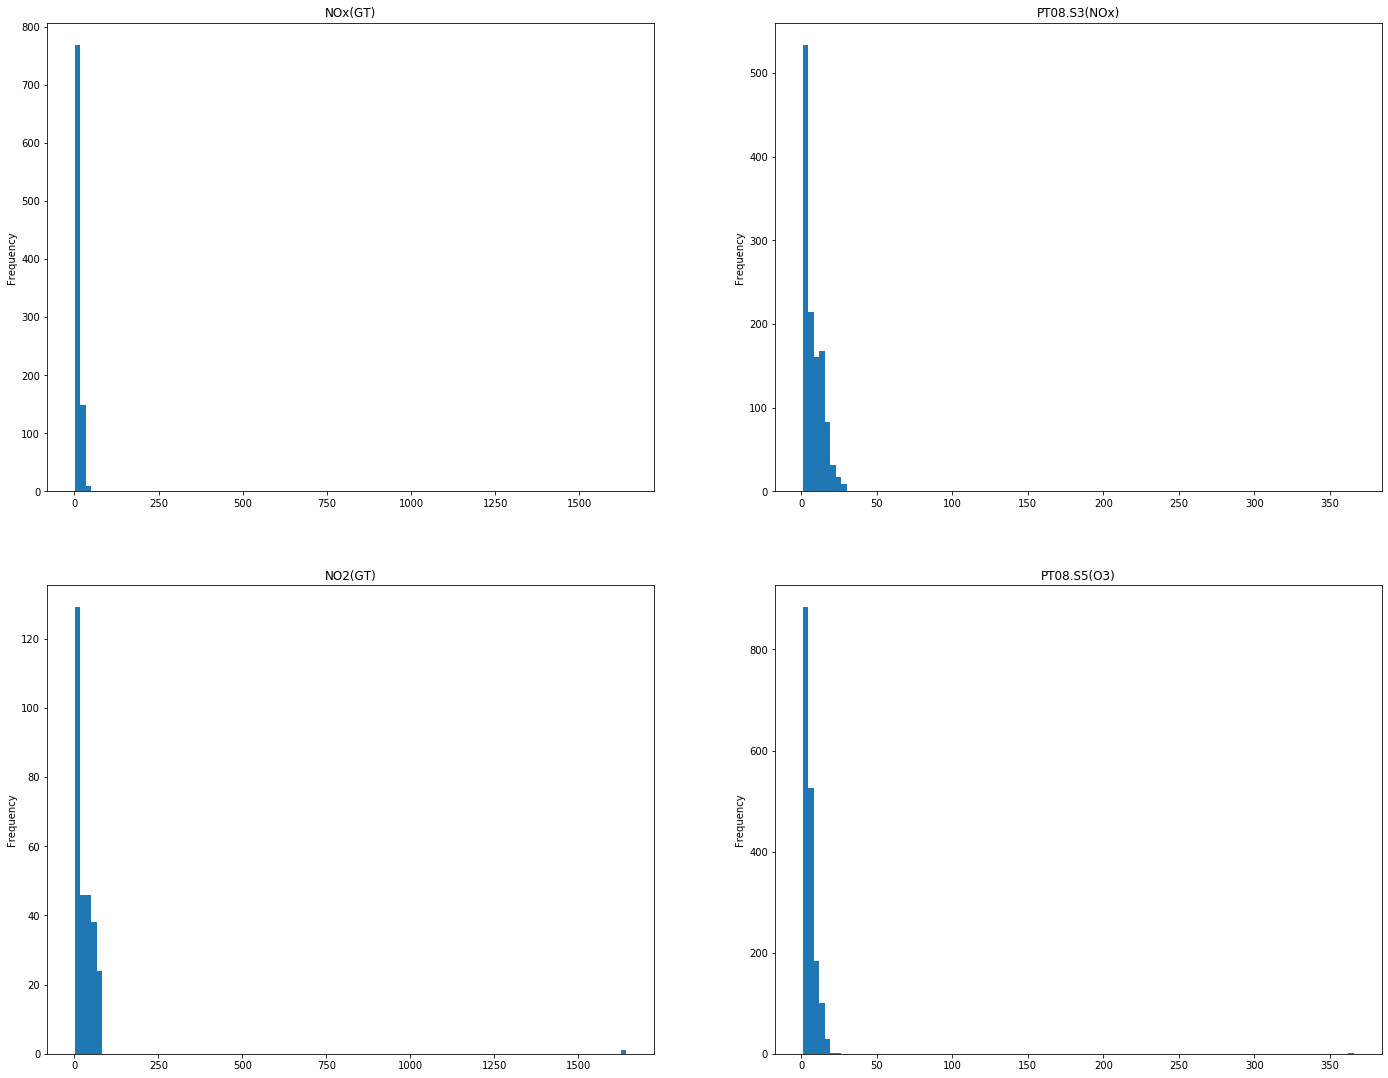

In [1066]:
# Set up a grid of plots
fig = plt.figure(figsize=(50, 50)) 
fig_dims = (5, 4)

# Plot Type of transmission
plt.subplot2grid(fig_dims, (0, 0))
df['NOx(GT)'].value_counts().plot(kind='hist', 
                                   title='NOx(GT)',bins=100)


plt.subplot2grid(fig_dims, (0, 1))
df['PT08.S3(NOx)'].value_counts().plot(kind='hist', title='PT08.S3(NOx)',bins=100)


plt.subplot2grid(fig_dims, (1, 0))
df['NO2(GT)'].value_counts().plot(kind='hist', title='NO2(GT)',bins=100)
plt.xticks(rotation=0)


plt.subplot2grid(fig_dims, (1, 1))
df['PT08.S5(O3)'].value_counts().plot(kind='hist', title='PT08.S5(O3)',bins=100)

plt.show()

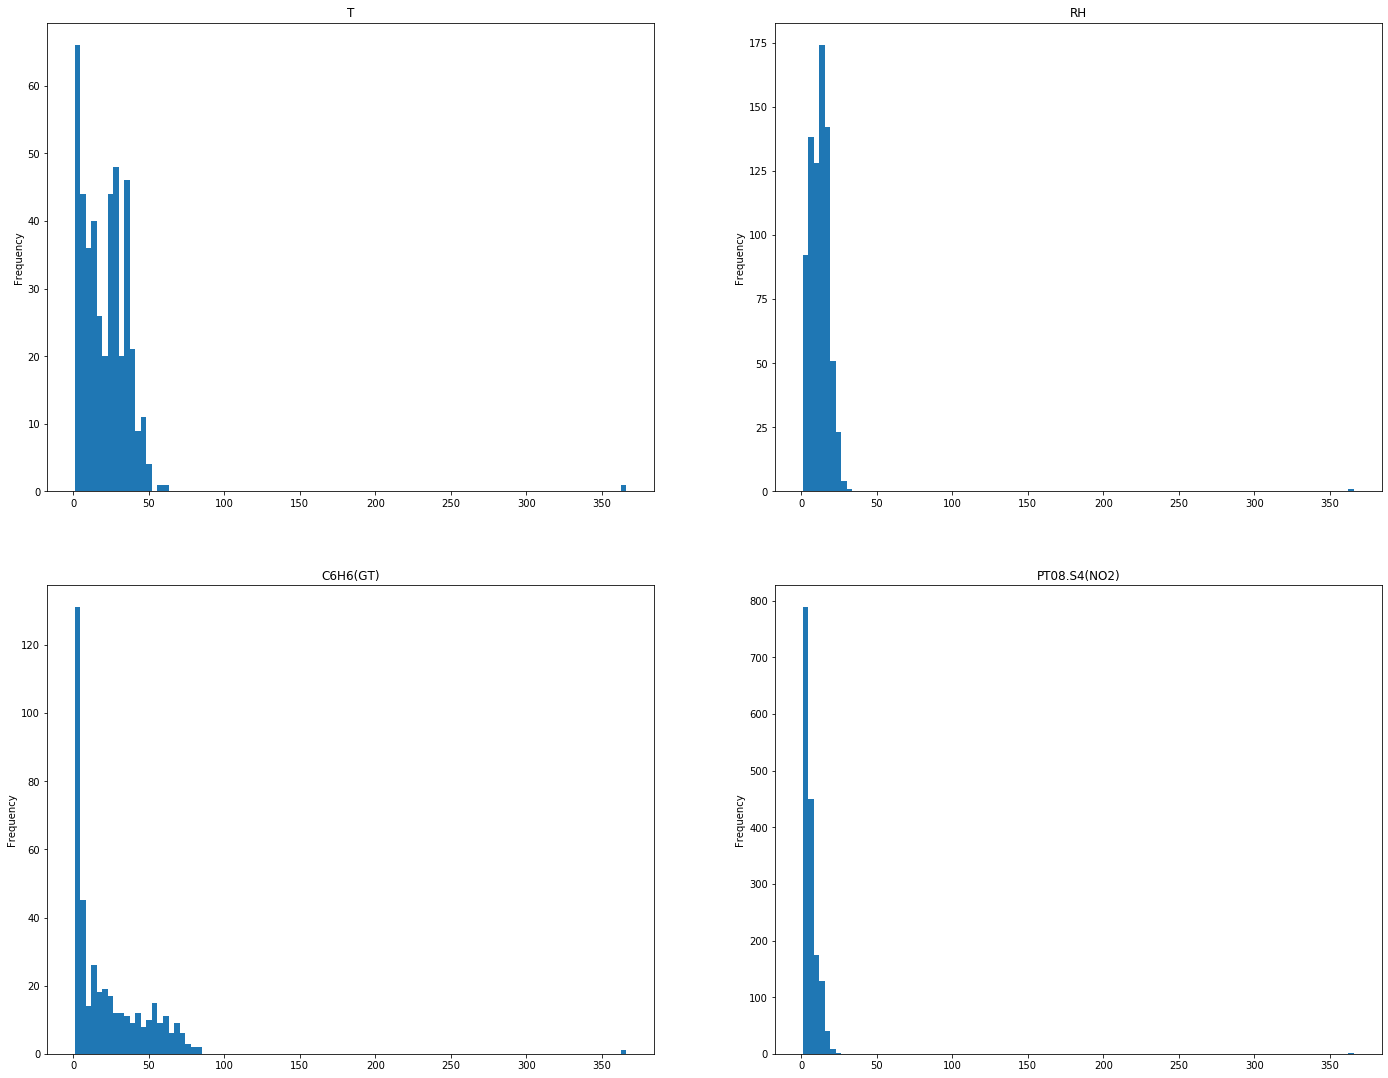

In [1067]:
# Set up a grid of plots
fig = plt.figure(figsize=(50, 50)) 
fig_dims = (5, 4)

# Plot Type of transmission
plt.subplot2grid(fig_dims, (0, 0))
df['T'].value_counts().plot(kind='hist', 
                                   title='T',bins=100)


plt.subplot2grid(fig_dims, (0, 1))
df['RH'].value_counts().plot(kind='hist', title='RH',bins=100)


plt.subplot2grid(fig_dims, (1, 0))
df['C6H6(GT)'].value_counts().plot(kind='hist', title='C6H6(GT)',bins=100)

plt.subplot2grid(fig_dims, (1, 1))
df['PT08.S4(NO2)'].value_counts().plot(kind='hist', title='PT08.S4(NO2)',bins=100)

plt.show()

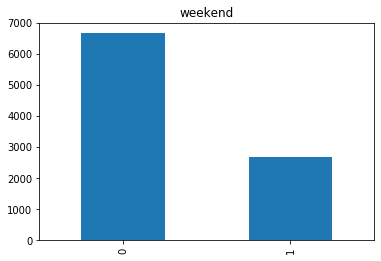

In [1068]:
df['weekend'].value_counts().plot(kind='bar', title='weekend')
plt.show()

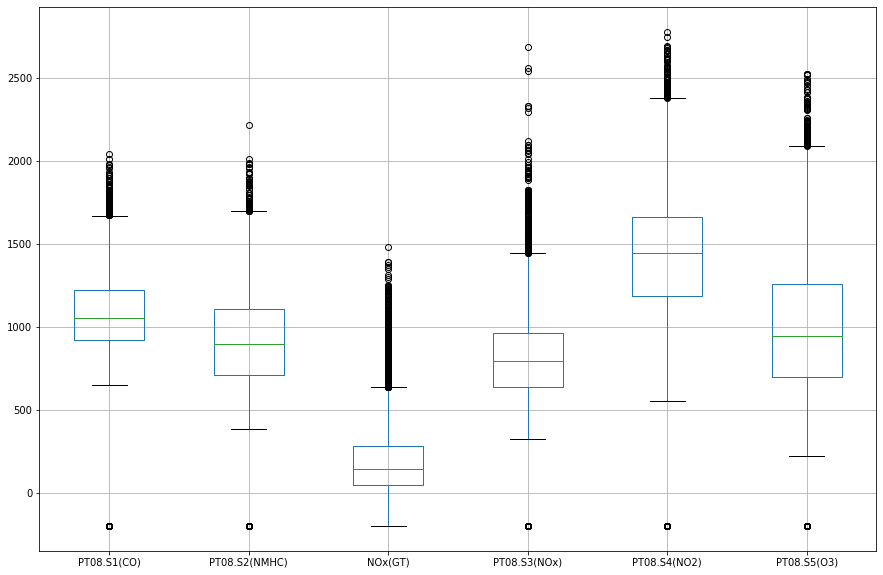

In [1069]:
df.boxplot(column=[ 'PT08.S1(CO)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)'],figsize=(15,10))

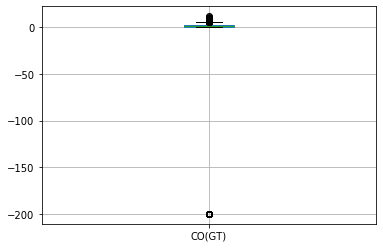

In [1070]:
df.boxplot(column='CO(GT)')

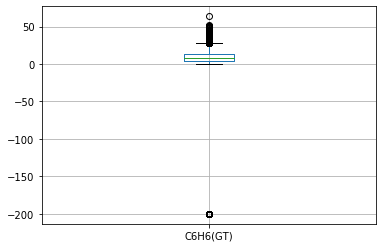

In [1071]:
df.boxplot(column='C6H6(GT)')

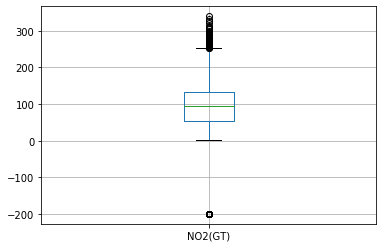

In [1072]:
df.boxplot(column='NO2(GT)')

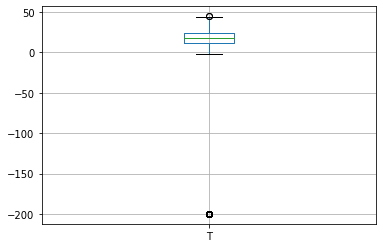

In [1073]:
df.boxplot(column='T')

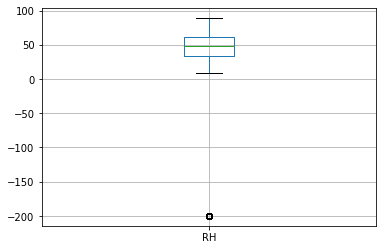

In [1074]:
df.boxplot(column='RH')

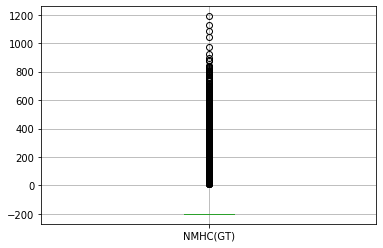

In [1075]:
df.boxplot(column='NMHC(GT)')

In [1076]:
sum(df.RH < -199)

366

In [1077]:
sum(df.RH < -201)

0

In [1078]:
len(df['NMHC(GT)'].unique())

430

In [1079]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,weekend
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.874746,-159.090093,1.865683,894.476969,168.605536,794.871754,58.135834,1391.361975,974.953618,9.776852,39.483873,0.287272
std,77.657170,329.818519,139.789093,41.380206,342.316710,257.427995,321.977764,126.931715,467.195781,456.926877,43.203377,51.215786,0.452514
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,0.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.000000
50%,1.500000,1052.000000,-200.000000,7.900000,894.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.000000
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.000000
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,1.000000


In [1080]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
weekend          9357 non-null int64
dtypes: float64(12), int64(1)
memory usage: 950.4 KB


In [1081]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,weekend
0,1.5,1088.0,-200.0,11.3,1024.0,180.0,831.0,111.0,1452.0,1182.0,27.4,31.5,0
1,2.0,1096.0,-200.0,13.0,1083.0,310.0,971.0,129.0,1430.0,986.0,35.0,17.3,0
2,1.4,999.0,-200.0,7.5,879.0,180.0,1114.0,119.0,1260.0,960.0,24.9,28.3,0
3,1.2,980.0,-200.0,7.4,873.0,141.0,1088.0,98.0,1258.0,949.0,23.2,30.5,0
4,0.6,859.0,-200.0,3.8,698.0,105.0,1254.0,89.0,1157.0,819.0,22.3,33.6,0


In [1082]:
len(df[df['NMHC(GT)'] == -200]) #NMHC can be deleted because 8443/9357 values are equal -200

8443

In [1120]:
len(df[df['C6H6(GT)'] < 0])

366

In [1083]:
df.shape

(9357, 13)

# Outliers

In [1135]:
len(df[df['PT08.S2(NMHC)'] < 400])

KeyError: 'PT08.S2(NMHC)'

In [1137]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CO(GT)            2.00
C6H6(GT)          9.60
NOx(GT)         234.00
PT08.S3(NOx)    323.00
NO2(GT)          80.00
RH               27.80
weekend           1.00
PT08_feat       387.25
dtype: float64


# Correlation

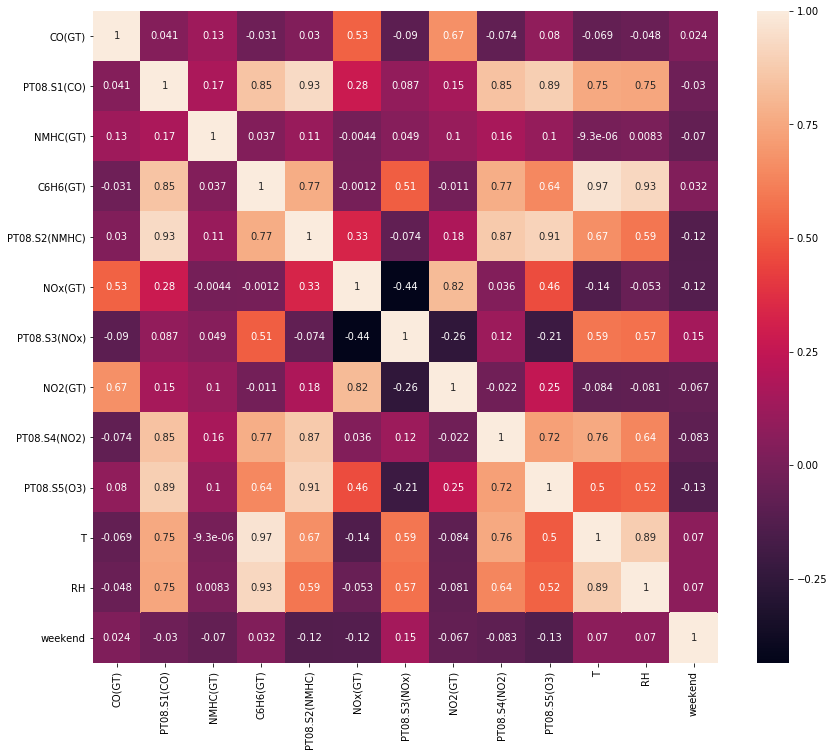

In [1084]:
plt.subplots(figsize =(14, 12))
hm = sns.heatmap(df.corr(), 
           xticklabels=df.columns,
           yticklabels=df.columns,annot=True)

In [1085]:
df.drop(columns= 'T',axis = 1,inplace=True)

In [1086]:
df.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'RH', 'weekend'],
      dtype='object')

In [1087]:
df3 = df[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']]

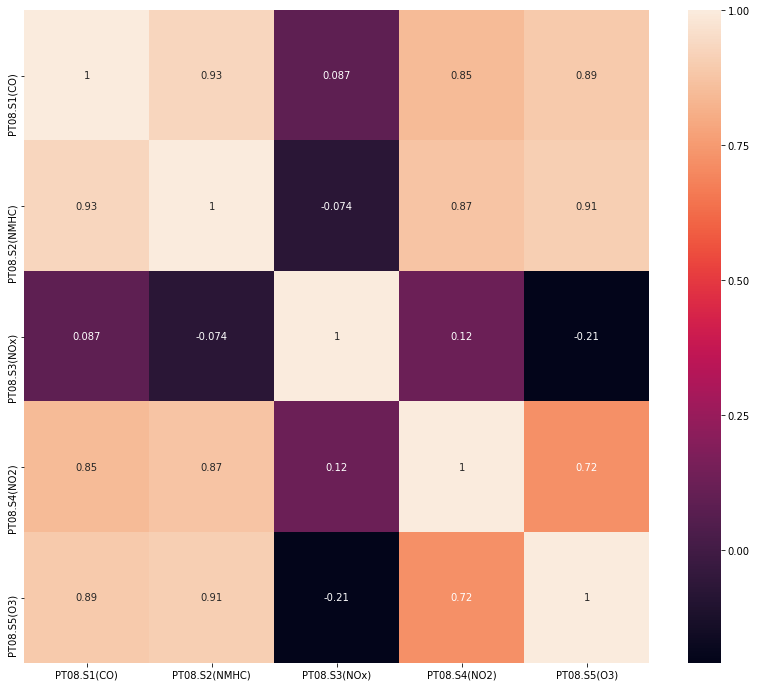

In [1088]:
plt.subplots(figsize =(14, 12))
hm = sns.heatmap(df3.corr(), 
           xticklabels=df3.columns,
           yticklabels=df3.columns,annot=True)

### Feature engeneering

In [1089]:
df['PT08_feat'] = ( df['PT08.S2(NMHC)'] + df['PT08.S1(CO)'] + df['PT08.S4(NO2)'] + df['PT08.S5(O3)']) / 4

In [1090]:
df.drop(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)','PT08.S4(NO2)', 'PT08.S5(O3)','NMHC(GT)'],axis=1,inplace=True)

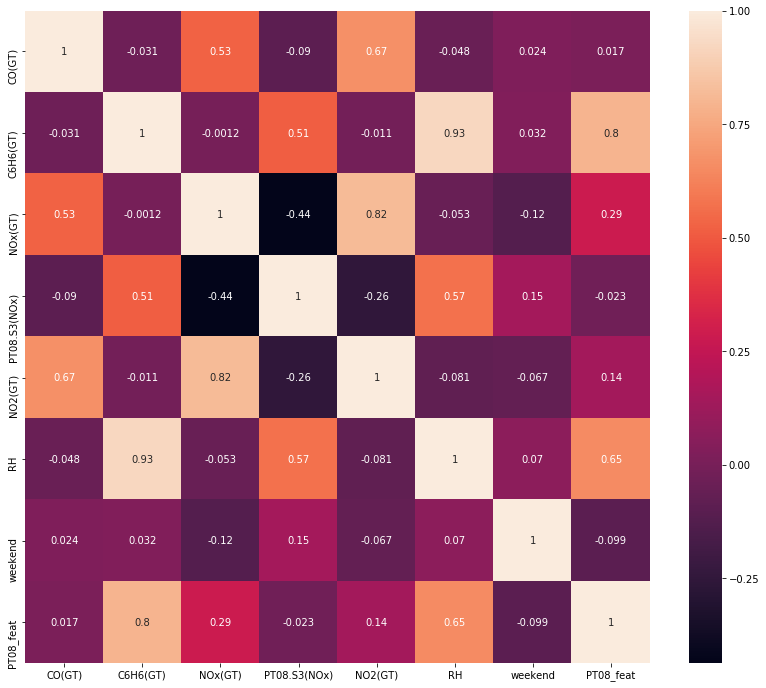

In [1091]:
plt.subplots(figsize =(14, 12))
hm = sns.heatmap(df.corr(), 
           xticklabels=df.columns,
           yticklabels=df.columns,annot=True)

In [1092]:
df.head()

,CO(GT),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),RH,weekend,PT08_feat
0,1.5,11.3,180.0,831.0,111.0,31.5,0,1186.50
1,2.0,13.0,310.0,971.0,129.0,17.3,0,1148.75
2,1.4,7.5,180.0,1114.0,119.0,28.3,0,1024.50
3,1.2,7.4,141.0,1088.0,98.0,30.5,0,1015.00
4,0.6,3.8,105.0,1254.0,89.0,33.6,0,883.25


In [1139]:
df.PT08_feat.mean()

1077.4168269744575

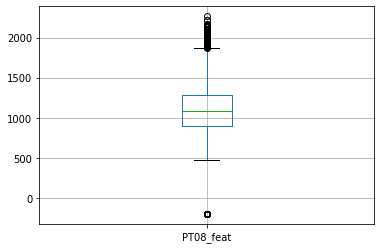

In [1142]:
df.boxplot(column='PT08_feat')

In [1148]:
sum(df.PT08_feat < 0)

366

In [1151]:
a = df.PT08_feat.mean()

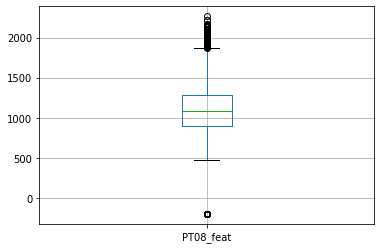

In [1153]:
df.boxplot(column='PT08_feat')

# Data preparation

In [1093]:
def prepare_dataset(df, class_name):
    df = remove_missing_values(df)
    numeric_columns = get_numeric_columns(df)
    rdf = df.copy(deep=True)
    df, feature_names, class_values = one_hot_encoding(df, class_name)
    real_feature_names = get_real_feature_names(rdf, numeric_columns, class_name)
    rdf = rdf[real_feature_names + (class_values if isinstance(class_name, list) else [class_name])]
    features_map = get_features_map(feature_names, real_feature_names)

    return df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map

def remove_missing_values(df):
    for column_name, nbr_missing in df.isna().sum().to_dict().items():
        if nbr_missing > 0:
            if column_name in df._get_numeric_data().columns:
                mean = df[column_name].mean()
                df[column_name].fillna(mean, inplace=True)
            else:
                mode = df[column_name].mode().values[0]
                df[column_name].fillna(mode, inplace=True)
    return df

def get_numeric_columns(df):
    numeric_columns = list(df._get_numeric_data().columns)
    return numeric_columns

def get_real_feature_names(rdf, numeric_columns, class_name):
    real_feature_names = [c for c in rdf.columns if c in numeric_columns and c != class_name]
    real_feature_names += [c for c in rdf.columns if c not in numeric_columns and c != class_name]
    return real_feature_names

def one_hot_encoding(df, class_name):
    dfX = pd.get_dummies(df[[c for c in df.columns if c != class_name]], prefix_sep='=')
    class_name_map = {v: k for k, v in enumerate(sorted(df[class_name].unique()))}
    dfY = df[class_name].map(class_name_map)
    df = pd.concat([dfX, dfY], axis=1, join_axes=[dfX.index])
    feature_names = list(dfX.columns)
    class_values = sorted(class_name_map)
    return df, feature_names, class_values

def get_features_map(feature_names, real_feature_names):
    features_map = defaultdict(dict)
    i = 0
    j = 0

    while i < len(feature_names) and j < len(real_feature_names):
        if feature_names[i] == real_feature_names[j]:
            features_map[j][feature_names[i]] = j
            i += 1
            j += 1
        elif feature_names[i].startswith(real_feature_names[j]):
            features_map[j][feature_names[i]] = j
            i += 1
        else:
            j += 1
    return features_map

In [1094]:
class_name = 'weekend'

In [1095]:
res = prepare_dataset(df, class_name)
df.head()

,CO(GT),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),RH,weekend,PT08_feat
0,1.5,11.3,180.0,831.0,111.0,31.5,0,1186.50
1,2.0,13.0,310.0,971.0,129.0,17.3,0,1148.75
2,1.4,7.5,180.0,1114.0,119.0,28.3,0,1024.50
3,1.2,7.4,141.0,1088.0,98.0,30.5,0,1015.00
4,0.6,3.8,105.0,1254.0,89.0,33.6,0,883.25


In [1096]:
df.head()

,CO(GT),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),RH,weekend,PT08_feat
0,1.5,11.3,180.0,831.0,111.0,31.5,0,1186.50
1,2.0,13.0,310.0,971.0,129.0,17.3,0,1148.75
2,1.4,7.5,180.0,1114.0,119.0,28.3,0,1024.50
3,1.2,7.4,141.0,1088.0,98.0,30.5,0,1015.00
4,0.6,3.8,105.0,1254.0,89.0,33.6,0,883.25


# Data partitioning

In [1097]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [1098]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# k Nearest Neighbor

In [1099]:
from sklearn.neighbors import KNeighborsClassifier

In [1100]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [1101]:
y_pred = clf.predict(X_test)

In [1102]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7175925925925926
F1-score [0.81024168 0.44815588]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      2001
           1       0.51      0.40      0.45       807

    accuracy                           0.72      2808
   macro avg       0.64      0.62      0.63      2808
weighted avg       0.70      0.72      0.71      2808



In [1103]:
clf = KNeighborsClassifier(n_neighbors=8, weights='uniform')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7243589743589743
F1-score [0.82464884 0.35607321]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      2001
           1       0.54      0.27      0.36       807

    accuracy                           0.72      2808
   macro avg       0.65      0.59      0.59      2808
weighted avg       0.69      0.72      0.69      2808



In [1110]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7293447293447294
F1-score [0.82774252 0.36877076]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      2001
           1       0.56      0.28      0.37       807

    accuracy                           0.73      2808
   macro avg       0.66      0.59      0.60      2808
weighted avg       0.70      0.73      0.70      2808



In [1105]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.6860 (+/- 0.028)
F1-score: 0.5325 (+/- 0.052)


In [1106]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [1107]:
parameters = {'n_neighbors': np.arange(1, 10 + 1), 'weights':['uniform', 'distance']}

knn = KNeighborsClassifier()
search = GridSearchCV(knn, parameters)
search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [1108]:
clf = search.best_estimator_

In [1109]:
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

## An example from sklearn

In [878]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

n_neighbors = 15


# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = X_train[:, :2]
y = y_train

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

KeyboardInterrupt: 

# Linear Regression

In [879]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [880]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [881]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 0.00056792 -0.00013102  0.00291976 -0.0001305  -0.00012561 -0.00012644
  0.00089802 -0.00041815]
Intercept: 
 0.8238369364062166


In [882]:
y_pred = reg.predict(X_test)

In [883]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.052
MSE: 0.194
MAE: 0.388


# Linear Regression in 2 dimensions

In [884]:
reg = LinearRegression()
reg.fit(X_train.T[0].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.001
MSE: 0.205
MAE: 0.409


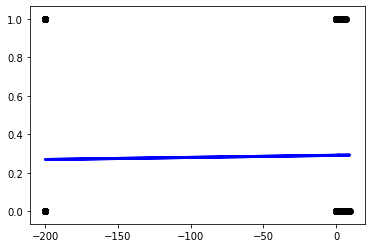

In [885]:
plt.scatter(X_test.T[0], y_test,  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
plt.show()

# Lasso

In [886]:
reg = Lasso()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 2.50385673e-04 -1.91610402e-04  0.00000000e+00 -1.16012723e-04
  1.47694433e-04 -0.00000000e+00  1.24271238e-04 -8.56857129e-05]
Intercept: 
 0.25405289720555313


In [887]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.044
MSE: 0.196
MAE: 0.393


# Ridge

In [888]:
reg = Ridge()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 0.00056792 -0.00013102  0.00291975 -0.0001305  -0.00012561 -0.00012644
  0.00089802 -0.00041815]
Intercept: 
 0.8238362379083304


In [889]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.052
MSE: 0.194
MAE: 0.388


# Slides Example

Coefficients: 
 [58.87472632]
Mean squared error: 3.40
Coefficient of determination: 0.93
1.4326654016445288


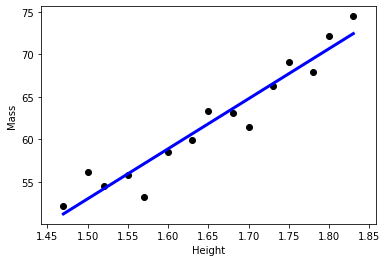

In [891]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model

Height = np.array([1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83])
Mass = np.array([52.21, 56.12, 54.48, 55.84, 53.20, 58.57, 59.93, 63.29, 63.11, 61.47, 66.28, 69.10, 67.92, 
                 72.19, 74.46])

diabetes_X_train = Height
diabetes_y_train = Mass

diabetes_X_test = Height
diabetes_y_test = Mass

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train.reshape(-1, 1), diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test.reshape(-1, 1))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))
print(mean_absolute_error(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xlabel('Height')
plt.ylabel('Mass')

#plt.xticks(())
#plt.yticks(())

plt.show()

# Logistic Regression

In [892]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report

In [894]:
from sklearn.linear_model import LogisticRegression

In [895]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [896]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7061965811965812
F1-score [0.82758621 0.00722022]
              precision    recall  f1-score   support

           0       0.71      0.99      0.83      2001
           1       0.12      0.00      0.01       807

    accuracy                           0.71      2808
   macro avg       0.42      0.50      0.42      2808
weighted avg       0.54      0.71      0.59      2808



In [897]:
from scipy.special import expit

In [911]:
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Churn', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [912]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

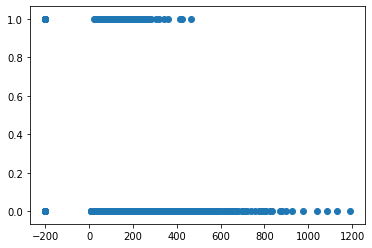

In [913]:
plt.scatter(X_train[:,1], y_train)

loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)

plt.plot(sorted(X_test), reg.coef_ * sorted(X_test) + reg.intercept_, color='red', linewidth=3)


plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Churn', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Classification

In [918]:
from sklearn.tree import DecisionTreeClassifier

In [919]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7026353276353277
F1-score [0.79458795 0.46163765]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      2001
           1       0.48      0.44      0.46       807

    accuracy                           0.70      2808
   macro avg       0.63      0.63      0.63      2808
weighted avg       0.70      0.70      0.70      2808



# Variance Threshold

In [920]:
from sklearn.feature_selection import VarianceThreshold

In [921]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(6549, 8)

In [922]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7026353276353277
F1-score [0.79458795 0.46163765]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      2001
           1       0.48      0.44      0.46       807

    accuracy                           0.70      2808
   macro avg       0.63      0.63      0.63      2808
weighted avg       0.70      0.70      0.70      2808



# Univariate Feature Selection

In [923]:
from sklearn.feature_selection import SelectKBest

In [925]:
sel = SelectKBest(k=5)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(6549, 5)

In [926]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6534900284900285
F1-score [0.75874039 0.38534428]
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      2001
           1       0.39      0.38      0.39       807

    accuracy                           0.65      2808
   macro avg       0.57      0.57      0.57      2808
weighted avg       0.65      0.65      0.65      2808



# Recursive Feature Elimination

In [927]:
from sklearn.feature_selection import SelectFromModel

In [928]:
sel = SelectFromModel(DecisionTreeClassifier())
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(6549, 4)

In [929]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6777065527065527
F1-score [0.77515528 0.43117536]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      2001
           1       0.44      0.43      0.43       807

    accuracy                           0.68      2808
   macro avg       0.60      0.60      0.60      2808
weighted avg       0.67      0.68      0.68      2808



# Principal Component Analysis

In [930]:
from sklearn.decomposition import PCA

In [931]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [932]:
X_train_pca.shape

(6549, 2)

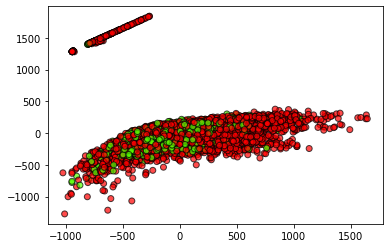

In [933]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [934]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6520655270655271
F1-score [0.76106628 0.36018337]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      2001
           1       0.38      0.34      0.36       807

    accuracy                           0.65      2808
   macro avg       0.56      0.56      0.56      2808
weighted avg       0.64      0.65      0.65      2808



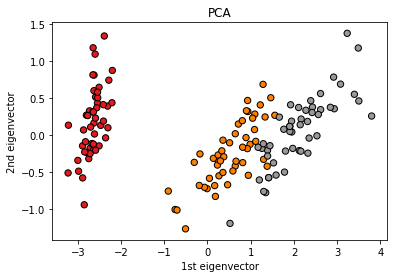

In [935]:
from sklearn import datasets

iris = datasets.load_iris()
X_pca = PCA(n_components=2).fit_transform(iris.data)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.title("PCA")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.show()

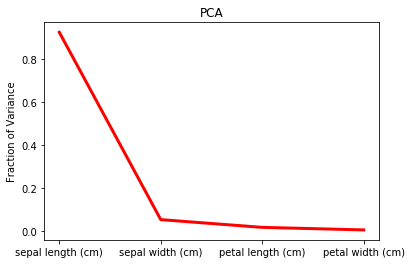

In [936]:
plt.plot(PCA(n_components=4).fit(iris.data).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.xticks(range(4), iris.feature_names)
plt.show()

# Classification

In [937]:
from sklearn.tree import DecisionTreeClassifier

In [938]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.7026353276353277
F1-score [0.79458795 0.46163765]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      2001
           1       0.48      0.44      0.46       807

    accuracy                           0.70      2808
   macro avg       0.63      0.63      0.63      2808
weighted avg       0.70      0.70      0.70      2808



# ROC curve

In [939]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [940]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

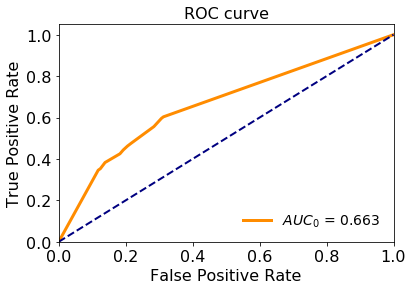

In [941]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Adjust the Decision Threshold

Accuracy 0.7279202279202279
F1-score [0.82207732 0.42208775]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      2001
           1       0.54      0.35      0.42       807

    accuracy                           0.73      2808
   macro avg       0.66      0.61      0.62      2808
weighted avg       0.70      0.73      0.71      2808



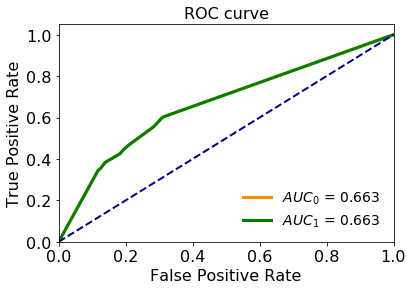

In [942]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test, thr=0.8)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# PCA

In [943]:
from sklearn.decomposition import PCA

In [944]:
X_train.shape

(6549, 8)

In [945]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

In [946]:
X_pca.shape

(6549, 2)

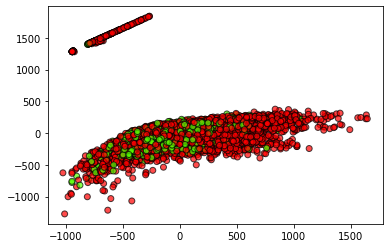

In [947]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

# Undersampling

In [948]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour

C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.en

### RandomUnderSampler

In [949]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


NameError: name 'Counter' is not defined

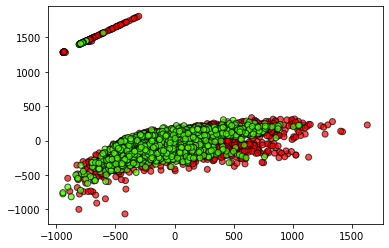

In [950]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.6595441595441596
F1-score [0.73836891 0.5127421 ]
              precision    recall  f1-score   support

           0       0.82      0.67      0.74      2001
           1       0.44      0.62      0.51       807

    accuracy                           0.66      2808
   macro avg       0.63      0.65      0.63      2808
weighted avg       0.71      0.66      0.67      2808



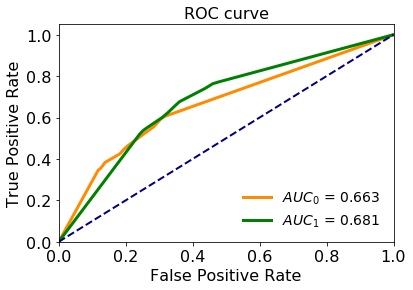

In [951]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### CondensedNearestNeighbour

In [952]:
import warnings
warnings.simplefilter("ignore")

In [954]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=1)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

KeyboardInterrupt: 

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

### RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Class Weight 

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, class_weight={0:1, 1: 5}, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Meta-Cost Sensitive Classifier

In [ ]:
from costcla.models import CostSensitiveDecisionTreeClassifier
from costcla.metrics import savings_score

cost_mat : array-like of shape = [n_samples, 4]

Cost matrix of the classification problem Where the columns represents the costs of: false positives, false negatives, true positives and true negatives, for each example.

In [ ]:
cost = [1, 10, 0, 0]
cost_mat = np.array([cost] * len(X_train))
cost_mat.shape

In [ ]:
cost_mat

In [ ]:
clf = CostSensitiveDecisionTreeClassifier()
clf.fit(X_train, y_train, cost_mat)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
cost_mat_test = np.array([cost] * len(X_test))
print(savings_score(y_test, y_pred, cost_mat_test))
print(savings_score(y_test, y_pred0, cost_mat_test))

# Scikit-plot

In [ ]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

In [ ]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
plot_roc(y_test, y_score)
plt.show()

In [ ]:
plot_precision_recall(y_test, y_score)
plt.show()

In [ ]:
plot_cumulative_gain(y_test, y_score)
plt.show()

In [ ]:
plot_lift_curve(y_test, y_score)
plt.show()